In [1]:
'''Lab Assignment: 03 (Image Classification)
Name: Dhruti Kamat
Roll No : 23
BE IT'''

'Lab Assignment: 03 (Image Classification)\nName: Dhruti Kamat\nRoll No : 23\nBE IT'

In [2]:
'''Build the Image classification model by dividing the model into following 4 stages:
1.Loading and preprocessing the image data
2.Defining the model's architecture
3.Training the model
4.Estimating the model's performance'''

"Build the Image classification model by dividing the model into following 4 stages:\n1.Loading and preprocessing the image data\n2.Defining the model's architecture\n3.Training the model\n4.Estimating the model's performance"

In [3]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [4]:
# Load the MNIST dataset
(images, labels), _ = mnist.load_data()

X = images
y = labels

In [5]:
# Loading and preprocessing the image data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [8]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

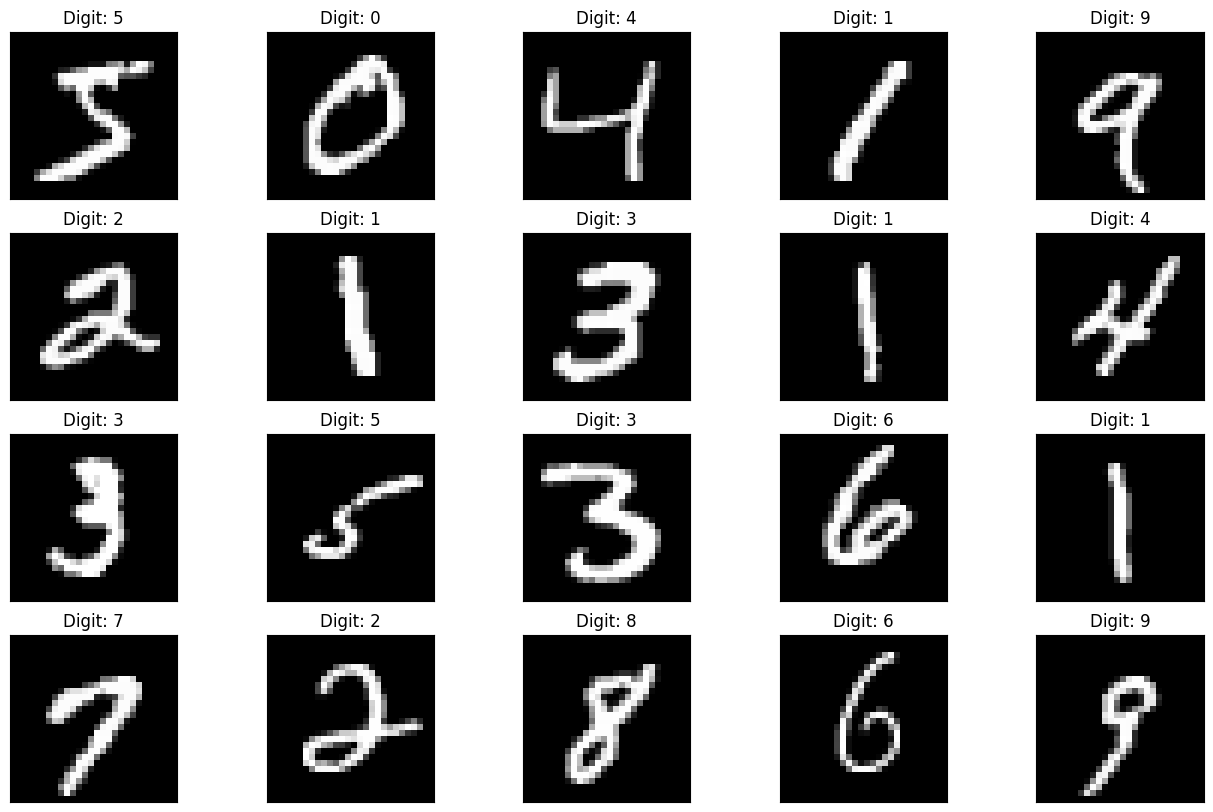

In [9]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
plt.show()

In [10]:
X_tarin = X_train.reshape((X_train.shape+ (1,)))
X_test = X_test.reshape((X_test.shape+(1,)))

In [11]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [12]:
# Defining the model's architecture

model = Sequential([
    Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Assuming you have X and y loaded, which represent the features and labels respectively
# Split the data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_val and y_val in model.fit
Model_log = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=15,
    verbose=1,
    validation_data=(X_val, y_val)
)

Epoch 1/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.1092 - loss: 3.9670 - val_accuracy: 0.1102 - val_loss: 2.3024
Epoch 2/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - accuracy: 0.1113 - loss: 2.3023 - val_accuracy: 0.1102 - val_loss: 2.3024
Epoch 3/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.1094 - loss: 2.3026 - val_accuracy: 0.0981 - val_loss: 2.3029
Epoch 4/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.1094 - loss: 2.3028 - val_accuracy: 0.1102 - val_loss: 2.3018
Epoch 5/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.1067 - loss: 2.3028 - val_accuracy: 0.1102 - val_loss: 2.3019
Epoch 6/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.1084 - loss: 2.3028 - val_accuracy: 0.1102 - val_loss: 2.3032
Epoch 7/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.1108 - loss: 2.3030 - val_accuracy: 0.1102 - val_loss: 2.3032
Epoch 8/10
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - accuracy: 0.1133 -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


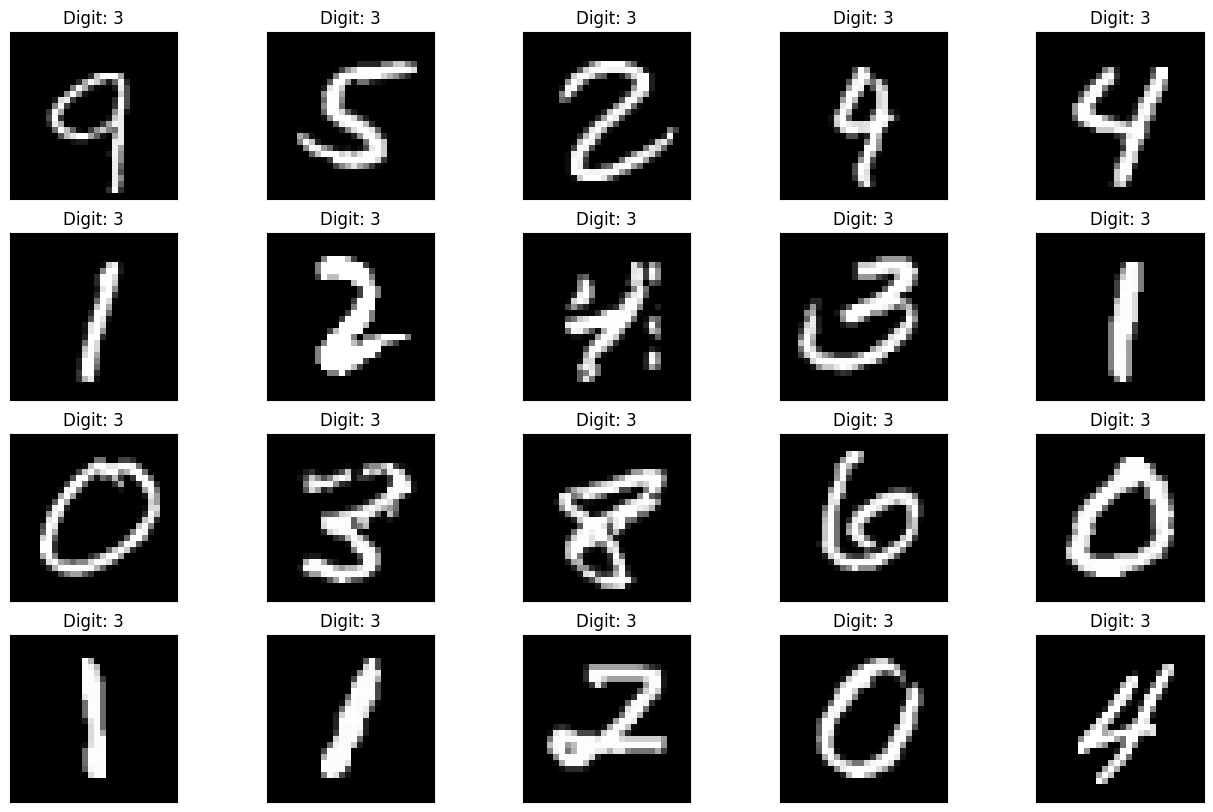

In [16]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)
plt.show()


In [17]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.101

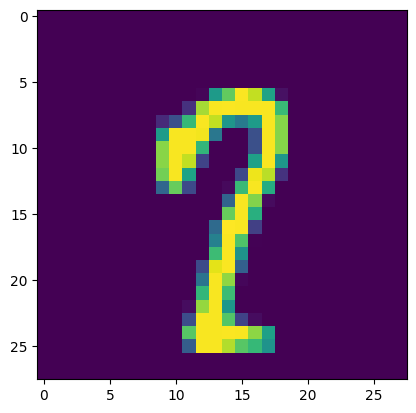

In [18]:
n = random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [19]:
predicted_value = model.predict(X_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n]))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Handwritten number in the image is = 3


In [20]:
# Estimating the model's performance
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:' , score[0])
print('Testaccuracy:',score[1])

Test loss: 2.303168296813965
Testaccuracy: 0.10100000351667404
